created a ppt report about this project - https://docs.google.com/presentation/d/1fUS5jmnaQRcz8vAWQL9PdDHteQ4HuH0Z/edit?usp=share_link&ouid=106590392887676566980&rtpof=true&sd=true

Aim:

The aim of this project is to develop a machine learning classifier that can accurately screen resumes and determine whether a candidate is suitable for a given role. The project will involve exploring and analyzing resume data, building and training machine learning models, and creating a dashboard to visualize the results.


Problem Statement:

The project aims to develop a machine learning classifier to screen resumes and determine whether a candidate is suitable for a given role. The classifier will be trained on a dataset of resumes and job descriptions, and the project will involve exploring and analyzing the data, building and training machine learning models, and creating a dashboard to visualize the results.

### Loading the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings('ignore')

In [2]:
 df = pd.read_csv('UpdatedResumeDataSet.csv')

In [3]:
df

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


# Data Preprocessing

## Exploratory Data Analysis

### Checking the data types and non-null values of each column

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [6]:
df['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

In [7]:
category = df['Category'].value_counts().reset_index()

# Data Visualization

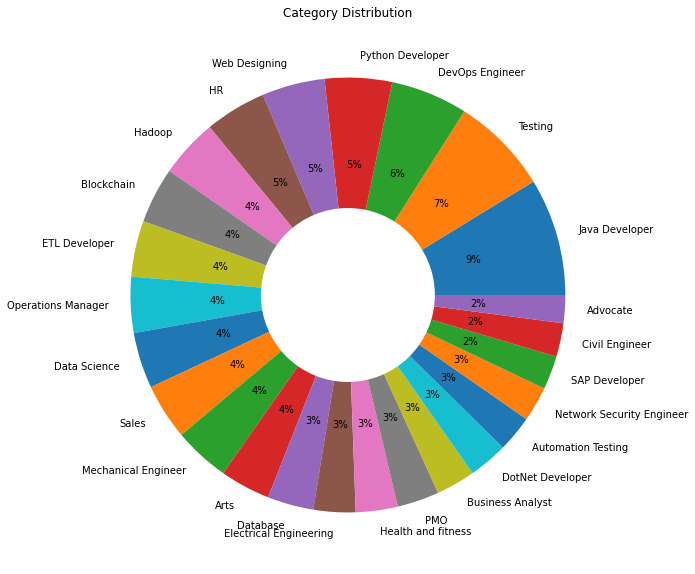

In [8]:
plt.figure(figsize=(25,10))
plt.pie(category['Category'], labels=category['index'], autopct='%0.0f%%')
centre_circle = plt.Circle((0,0),0.4,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Category Distribution')
plt.show()

In [9]:
category_counts = df['Category'].value_counts()
category_order = category_counts.index

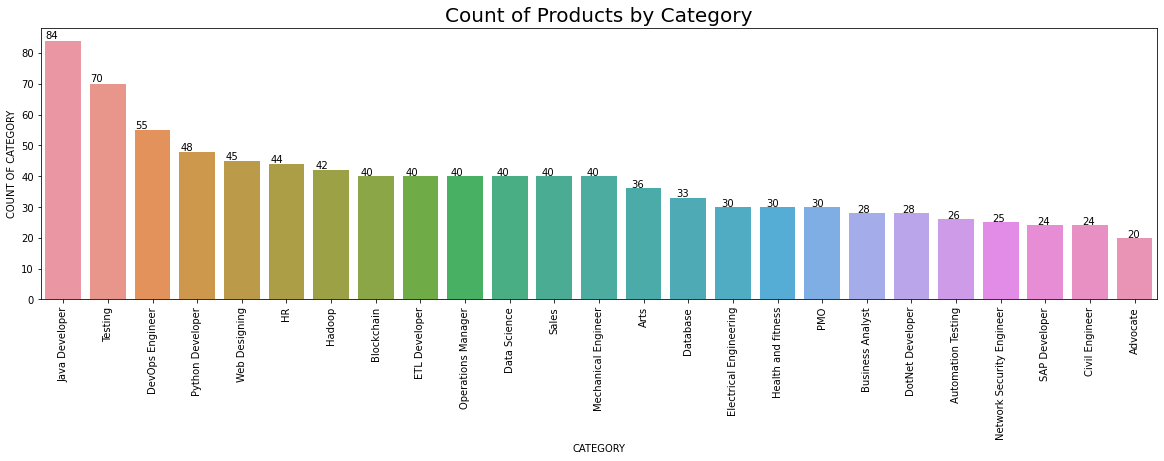

In [10]:
plt.figure(figsize=(20,5))
plot=sns.countplot(x='Category', data=df, order=category_order)
plt.xticks(rotation=90)
for p in plot.patches:
    plot.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))   
plt.title('Count of Products by Category', fontsize=20)
plt.xlabel('CATEGORY')
plt.ylabel('COUNT OF CATEGORY')
plt.show()

In [11]:
import re

In [12]:
clean_text=[]
for i in range(len(df['Resume'])):
  x=re.sub('[^a-zA-Z]',' ',df['Resume'][i])
  x=x.lower()
  clean_text.append(x)

In [13]:
clean_text

['skills   programming languages  python  pandas  numpy  scipy  scikit learn  matplotlib   sql  java  javascript jquery    machine learning  regression  svm  na  ve bayes  knn  random forest  decision trees  boosting techniques  cluster analysis  word embedding  sentiment analysis  natural language processing  dimensionality reduction  topic modelling  lda  nmf   pca   neural nets    database visualizations  mysql  sqlserver  cassandra  hbase  elasticsearch d  js  dc js  plotly  kibana  matplotlib  ggplot  tableau    others  regular expression  html  css  angular    logstash  kafka  python flask  git  docker  computer vision   open cv and understanding of deep learning education details     data science assurance associate     data science assurance associate   ernst   young llp  skill details   javascript  exprience      months  jquery  exprience      months  python  exprience      monthscompany details   company   ernst   young llp  description   fraud investigations and dispute serv

In [14]:
df['Clean_Resume']=pd.Series(clean_text)

In [15]:
df

,Category,Resume,Clean_Resume
0,Data Science,Skills * Programming Languages: Python (pandas...,skills programming languages python pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education details may to may b e ...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",areas of interest deep learning control syste...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skills r python sap hana table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education details mca ymcaust faridabad...
...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,computer skills proficient in ms office ...
958,Testing,â Willingness to accept the challenges. â ...,willingness to accept the challenges ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",personal skills quick learner eagerne...
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,computer skills software knowledge ms power ...


## Encoding Categorical Data

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le=LabelEncoder()

In [20]:
df['Category']=le.fit_transform(df['Category'])

In [22]:
df['Category'].value_counts()

15    84
23    70
8     55
20    48
24    45
12    44
13    42
3     40
10    40
18    40
6     40
22    40
16    40
1     36
7     33
11    30
14    30
19    30
4     28
9     28
2     26
17    25
21    24
5     24
0     20
Name: Category, dtype: int64

In [25]:
X=df['Clean_Resume']
y=df['Category']

### Splitting Data into Training and Testing Sets

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [28]:
feature_extraction=TfidfVectorizer()

In [29]:
X_train=feature_extraction.fit_transform(X_train)

In [30]:
X_test=feature_extraction.transform(X_test)

### Model Building and Evaluation

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
model1=KNeighborsClassifier()

In [33]:
model1.fit(X_train,y_train)

KNeighborsClassifier()

In [34]:
y_pred1=model1.predict(X_test)

In [35]:
from sklearn.metrics import classification_report

In [36]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         9
           6       1.00      0.60      0.75         5
           7       1.00      1.00      1.00         8
           8       1.00      0.93      0.96        14
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00        12
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         7
          15       1.00      1.00      1.00        15
          16       1.00      1.00      1.00         8
          17       1.00    

In [42]:
a1=input('Enter Skills:   ')
a1=feature_extraction.transform([a1])
pred=model1.predict(a1)
if pred==0:
  print('Advocate')
elif pred==1:
  print('Arts')
elif pred==2:
  print('Automation Testing')
elif pred==3:
  print('Blockchain')
elif pred==4:
  print('Business Analyst')
elif pred==5:
  print('Civil Engineer')
elif pred==6:
  print('Data Science')
elif pred==7:
  print('Database')
elif pred==8:
  print('DevOps Engineer')
elif pred==9:
  print('DotNet Developer')
elif pred==10:
  print('ETL Developer')
elif pred==11:
  print('Electrical Engineering')
elif pred==12:
  print('HR')
elif pred==13:
  print('Hadoop')
elif pred==14:
  print('Health and fitness')
elif pred==15:
  print('Java Developer')
elif pred==16:
  print('Mechanical Engineer')
elif pred==17:
  print('Network Security Engineer')
elif pred==18:
  print('Operations Manager')
elif pred==19:
  print('PMO')
elif pred==20:
  print('Python Developer')
elif pred==21:
  print('SAP Developer')
elif pred==22:
  print('Sales')
elif pred==23:
  print('Testing')
else:
  print('Web Designing')

Enter Skills:   machine learning
Data Science


Conclusion:

In conclusion, this project aims to develop a machine learning classifier that can accurately screen resumes and determine whether a candidate is suitable for a given role. The project will involve exploring and analyzing resume data, building and training machine learning models, and creating a dashboard to visualize the results. The outcome of this project will be a useful tool for businesses that receive a high volume of resumes and need to quickly identify suitable candidates.